# 군집 알고리즘

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 과일 사진 데이터 준비하기

In [2]:
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우

# 마이너스 기호가 깨지지 않도록 설정합니다.
plt.rcParams['axes.unicode_minus'] = False

In [3]:
pwd

'c:\\ex\\py\\practice'

In [4]:
# 다운로드 방법 1
# !wget https://bit.ly/fruits_300_data -O fruits_300.npy  리눅스용 명령어 
!curl -L https://bit.ly/fruits_300_data -o fruits_300.npy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   150  100   150    0     0    512      0 --:--:-- --:--:-- --:--:--   519

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0 2929k    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2929k  100 2929k    0     0  3643k      0 --:--:-- --:--:-- --:--:-- 38.1M


In [5]:
# 다운로드 방법 2
# import requests

# url = 'https://bit.ly/fruits_300_data'
# response = requests.get(url)

# with open('fruits_300.npy', 'wb') as file:
#     file.write(response.content)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fruits = np.load('fruits_300.npy') # 넘파이로 npy 파일 불러와짐 

In [8]:
print(fruits.shape)

(300, 100, 100)


In [9]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


In [22]:
fruits[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [23]:
np.unique(fruits[0])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [24]:
np.unique(fruits[0], return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [25]:
unique_values, counts = np.unique(fruits[0], return_counts=True)

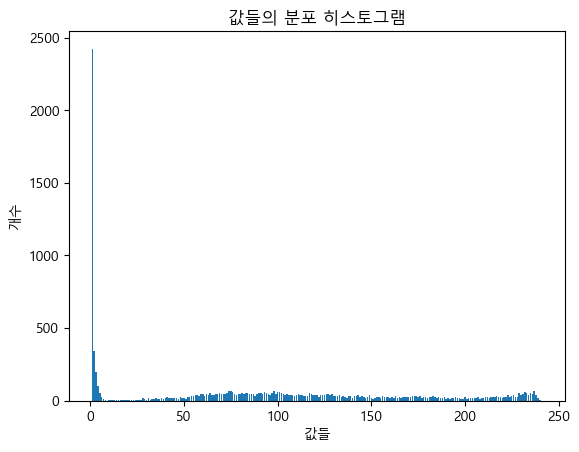

In [31]:
plt.bar(unique_values, counts)
plt.title('값들의 분포 히스토그램')
plt.xlabel('값들')
plt.ylabel('개수')
plt.show()

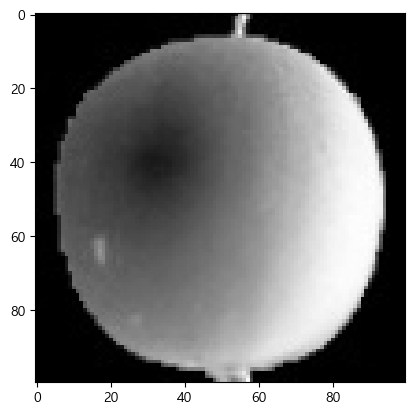

In [35]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

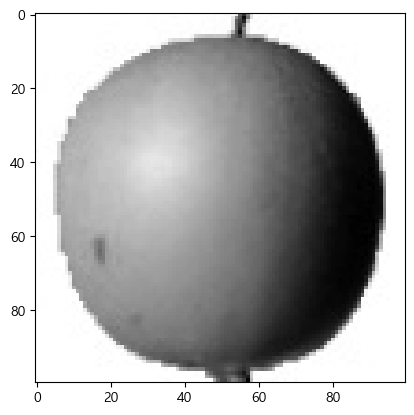

In [36]:
plt.imshow(fruits[0], cmap='gray_r')
plt.savefig('./1.jpg')
plt.show()

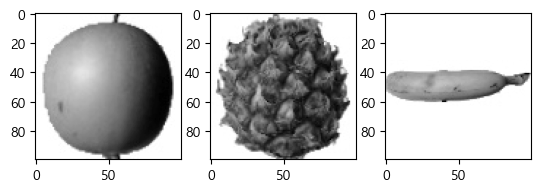

In [40]:
fig, axs = plt.subplots(1, 3)  
# 1행 3열의 서브플롯을 생성합니다.
# fig: 생성된 전체 그림 객체.
# axs: 각 서브플롯을 나타내는 축 객체의 배열.

axs[0].imshow(fruits[0], cmap='gray_r')  
# 첫 번째 서브플롯(axs[0])에 fruits 배열의 첫 번째 이미지를 표시합니다.
# cmap='gray_r': 이미지를 회색조로 표시하되, 색상 맵의 방향을 반전시킵니다.

axs[1].imshow(fruits[100], cmap='gray_r')  
# 두 번째 서브플롯(axs[1])에 fruits 배열의 101번째 이미지를 표시합니다.
# cmap='gray_r': 이미지를 회색조로 표시하되, 색상 맵의 방향을 반전시킵니다.

axs[2].imshow(fruits[200], cmap='gray_r')  
# 세 번째 서브플롯(axs[2])에 fruits 배열의 201번째 이미지를 표시합니다.
# cmap='gray_r': 이미지를 회색조로 표시하되, 색상 맵의 방향을 반전시킵니다.

plt.show()  
# 그림을 화면에 표시합니다.
# plt.show()를 호출해야 생성된 서브플롯이 화면에 나타납니다.


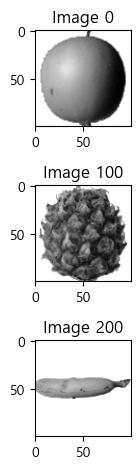

In [41]:
# 3행 1열의 서브플롯을 생성합니다.
fig, axs = plt.subplots(3, 1)

# 첫 번째 서브플롯(axs[0])에 fruits 배열의 첫 번째 이미지를 표시합니다.
axs[0].imshow(fruits[0], cmap='gray_r')
axs[0].set_title('Image 0')  # 서브플롯의 제목을 추가합니다.

# 두 번째 서브플롯(axs[1])에 fruits 배열의 101번째 이미지를 표시합니다.
axs[1].imshow(fruits[100], cmap='gray_r')
axs[1].set_title('Image 100')  # 서브플롯의 제목을 추가합니다.

# 세 번째 서브플롯(axs[2])에 fruits 배열의 201번째 이미지를 표시합니다.
axs[2].imshow(fruits[200], cmap='gray_r')
axs[2].set_title('Image 200')  # 서브플롯의 제목을 추가합니다.

# 서브플롯 간의 간격을 조정합니다.
plt.tight_layout()

# 그림을 화면에 표시합니다.
plt.show()


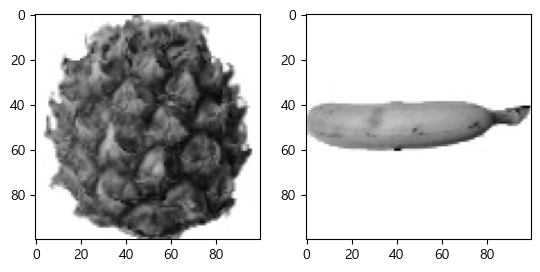

In [39]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [44]:
fruits[0].ravel()

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [43]:
fruits[0].ravel().mean()

88.3346

In [49]:
np.mean(fruits[0], axis=0).mean()

88.3346

(array([[100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 86.,  14.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 70.,  15.,   1.,  14.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 67.,   3.,   0.,  29.,   1.,   0.,   0.,   0.,   0.,   0.],
        [ 64.,   3.,   2.,  31.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 57.,   2.,   6.,  32.,   3.,   0.,   0.,   0.,   0.,   0.],
        [ 53.,   1.,   8.,  33.,   5.,   0.,   0.,   0.,   0.,   0.],
        [ 49.,   0.,  13.,  34.,   4.,   0.,   0.,   0.,   0.,   0.],
        [ 46.,   0.,  10.,  41.,   3.,   0.,   0.,   0.,   0.,   0.],
        [ 42.,   0.,  15.,  38.,   5.,   0.,   0.,   0.,   0.,   0.],
        [ 39.,   1.,

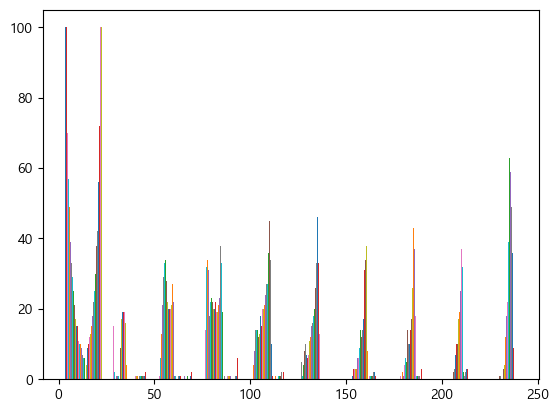

In [50]:
plt.hist(fruits[0]) 

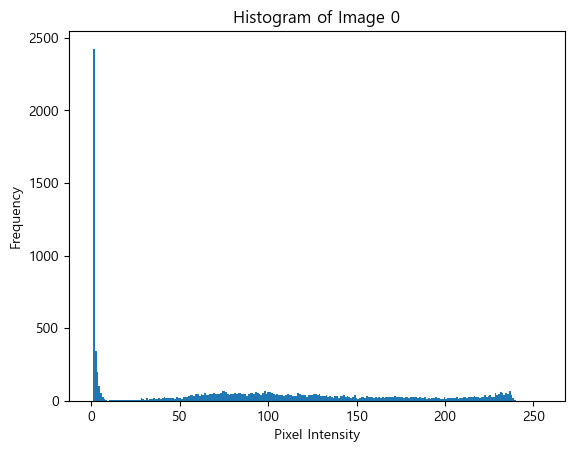

In [54]:
# 이미지의 픽셀 값으로 히스토그램을 생성합니다.
plt.hist(fruits[0].ravel(), bins=256, range=(0, 255), color='gray', edgecolor='black')

# 제목과 축 레이블을 설정합니다.
plt.title('Histogram of Image 0')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# 히스토그램을 화면에 표시합니다.
plt.show()


In [55]:
apple = fruits[0:100].ravel()
pineapple = fruits[100:200].ravel()
banana = fruits[200:300].ravel()

In [19]:
import cv2 as cv
# img_a = cv.imread('1.jpg',flags=cv.IMREAD_GRAYSCALE)

cv.imshow('fruits',fruits[0]) # 본다. 
# cv.imwrite('./apple.jpg',img_g) # 보고 저장 

cv.waitKey(3000) # 3초뒤에 꺼진다. 
cv.destroyAllWindows()

In [20]:
cv.imshow('fruits',fruits[1]) # 본다. 
# cv.imwrite('./apple.jpg',img_g) # 보고 저장 

cv.waitKey(3000) # 3초뒤에 꺼진다. 
cv.destroyAllWindows()

In [21]:
cv.imshow('fruits',fruits[1]) 
cv.waitKey(3000) 
cv.destroyAllWindows()

## 픽셀 값 분석하기

In [62]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [63]:
print(apple.shape)

(100, 10000)


In [66]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


(array([ 7.,  2., 16., 17.,  7., 14., 19.,  6.,  8.,  4.]),
 array([ 81.6226 ,  83.95888,  86.29516,  88.63144,  90.96772,  93.304  ,
         95.64028,  97.97656, 100.31284, 102.64912, 104.9854 ]),
 <BarContainer object of 10 artists>)

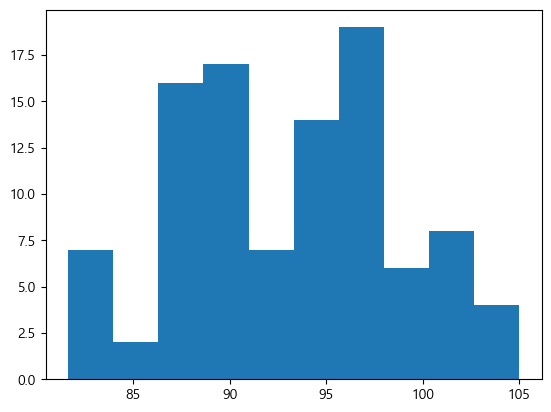

In [67]:
plt.hist(apple.mean(axis=1))

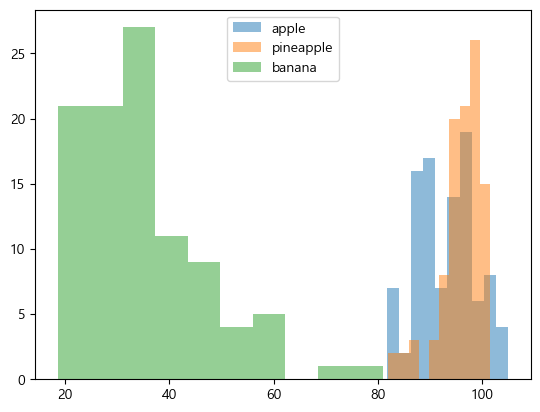

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# np.mean을 사용하여 각 이미지의 행별 평균 픽셀 값을 계산합니다.
# axis=1: 행 방향으로 평균을 계산합니다. 즉, 각 이미지의 각 행의 평균값을 구합니다.

# 사과 이미지의 행별 평균 픽셀 값으로 히스토그램을 생성합니다.
plt.hist(np.mean(apple, axis=1), alpha=0.5, label='apple') 
# alpha=0.5: 히스토그램의 투명도를 설정합니다. 0은 완전 투명, 1은 완전 불투명입니다.

# 파인애플 이미지의 행별 평균 픽셀 값으로 히스토그램을 생성합니다.
plt.hist(np.mean(pineapple, axis=1), alpha=0.5, label='pineapple')

# 바나나 이미지의 행별 평균 픽셀 값으로 히스토그램을 생성합니다.
plt.hist(np.mean(banana, axis=1), alpha=0.5, label='banana')

# 히스토그램에 범례를 추가하여 각 색상의 히스토그램이 어떤 이미지를 나타내는지 표시합니다.
plt.legend(['apple', 'pineapple', 'banana'])

# 히스토그램을 화면에 표시합니다.
plt.show()


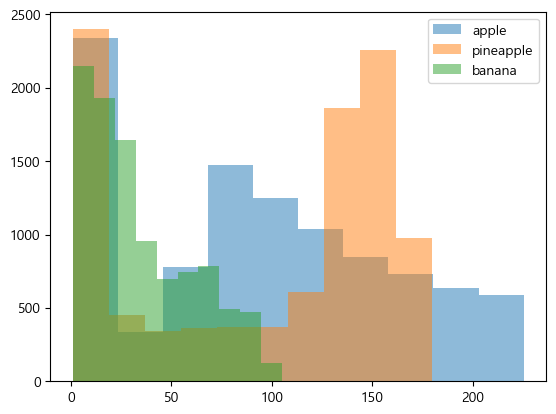

In [74]:
plt.hist(np.mean(apple, axis=0), alpha=0.5, label='apple') 
# alpha=0.5: 히스토그램의 투명도를 설정합니다. 0은 완전 투명, 1은 완전 불투명입니다.
plt.hist(np.mean(pineapple, axis=0), alpha=0.5, label='pineapple')
plt.hist(np.mean(banana, axis=0), alpha=0.5, label='banana')
# 히스토그램에 범례를 추가하여 각 색상의 히스토그램이 어떤 이미지를 나타내는지 표시합니다.
plt.legend(['apple', 'pineapple', 'banana'])
# 히스토그램을 화면에 표시합니다.
plt.show()

In [75]:
apple.mean(axis=0)

array([1.01, 1.01, 1.01, ..., 1.  , 1.  , 1.  ])

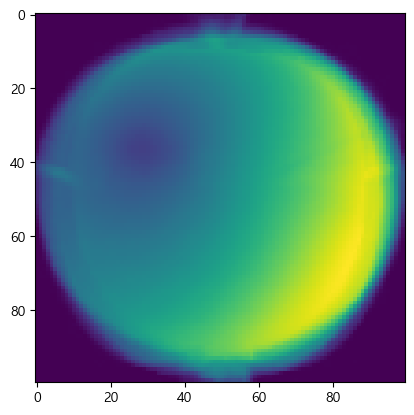

In [80]:
plt.imshow(a_mean)
plt.show()

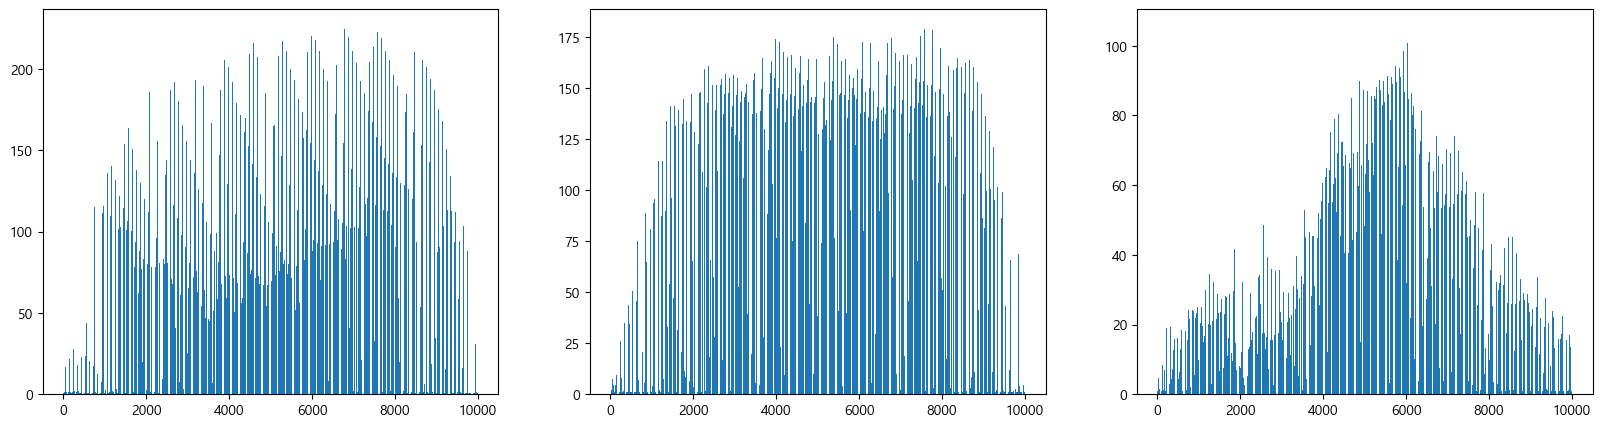

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

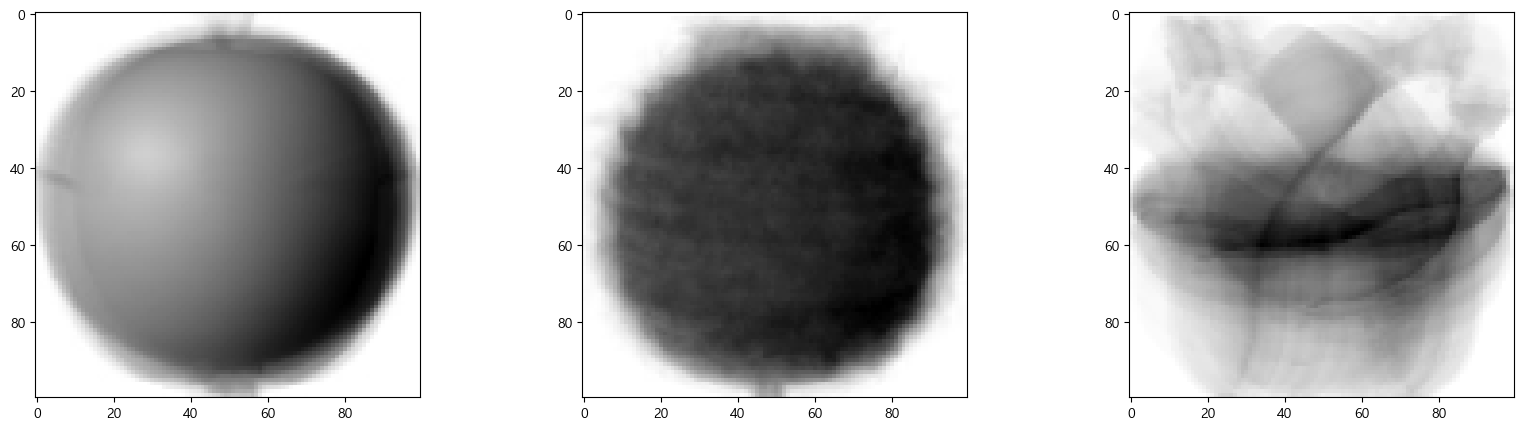

In [85]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

In [87]:
# fruits 배열의 모든 이미지와 apple_mean 이미지 간의 절대 차이를 계산합니다.
# fruits는 여러 이미지를 포함하는 배열이며, apple_mean은 사과 이미지의 평균값을 포함하는 2D 배열입니다.
# np.abs()는 각 요소에 대해 절대값을 계산합니다.
abs_diff = np.abs(fruits - apple_mean)

# 절대 차이 배열(abs_diff)의 각 이미지에 대해 평균 절대 차이를 계산합니다.
# axis=(1,2)는 두 번째(높이)와 세 번째(너비) 차원을 따라 평균을 계산합니다.
# 이로 인해 각 이미지에 대해 평균 절대 차이 값이 생성됩니다.
abs_mean = np.mean(abs_diff, axis=(1,2))

# abs_mean 배열의 shape을 출력합니다.
# 이 배열은 각 이미지에 대한 평균 절대 차이 값을 포함하며, shape은 (n_images,)가 됩니다.
print(abs_mean.shape)


(300,)


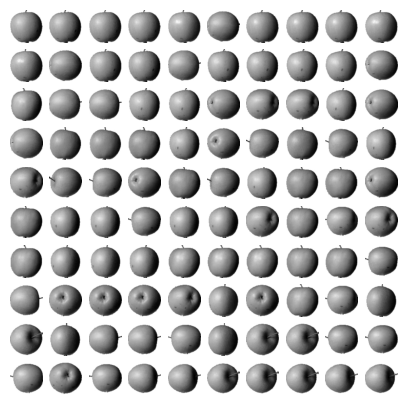

In [91]:
# abs_mean 배열에서 가장 작은 절대 차이 값을 가지는 상위 100개의 이미지 인덱스를 찾습니다.
# np.argsort()는 배열의 인덱스를 정렬하여 반환합니다. [:100]은 가장 작은 100개의 인덱스를 선택합니다.
apple_index = np.argsort(abs_mean)[:100]

# 10행 10열의 서브플롯을 생성합니다.
# figsize=(10,10)은 전체 그림의 크기를 설정합니다.
fig, axs = plt.subplots(10, 10, figsize=(5, 5))

# 10x10의 각 서브플롯에 대해 반복합니다.
for i in range(10):
    for j in range(10):
        # 선택된 이미지 배열의 인덱스를 사용하여 이미지 데이터를 가져옵니다.
        # apple_index[i*10 + j]는 현재 서브플롯의 이미지 인덱스를 지정합니다.
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        
        # 각 서브플롯의 축을 숨깁니다. (이미지 시각화에서 축을 제거하여 더 깔끔하게 표시합니다.)
        axs[i, j].axis('off')

# 생성된 서브플롯을 화면에 표시합니다.
plt.show()


## 확인문제

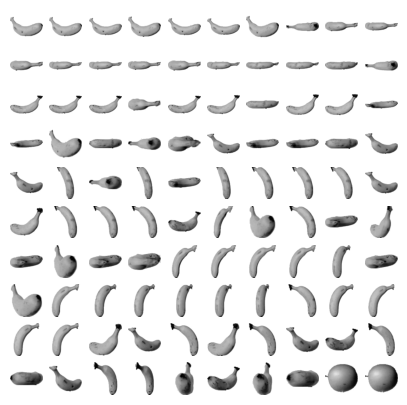

In [92]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(5,5))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()